<a href="https://colab.research.google.com/github/tottipensotti/crypto-charts-comparison/blob/main/crypto_charts_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crypto A: cardano
Crypto B: dai


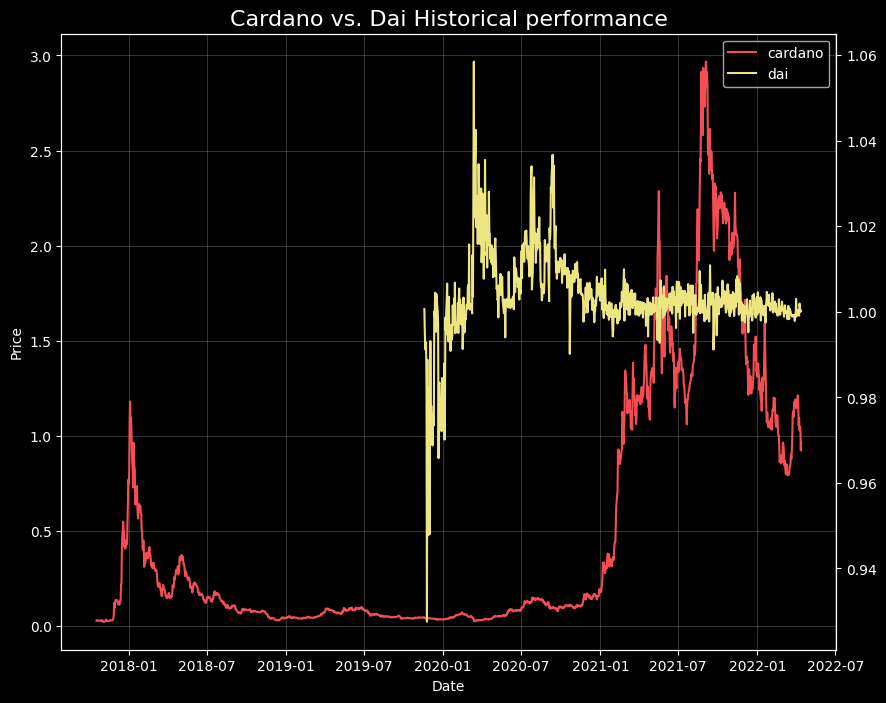

In [9]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

# coin
def get_data(coin):
  def cryptos():
    url = f'https://api.coingecko.com/api/v3/coins'
    r = requests.get(url)
    d = r.json()
    i = []

    for x in d:
      i.append(x['id'])
    return i

  try:
    url = f'https://api.coingecko.com/api/v3/coins/{coin}/market_chart'
    pms = {'vs_currency': 'usd', 'days': 'max', 'interval': 'daily'}
    r = requests.get(url, params = pms)
    d = r.json()

    time, price = [], []
    for i in d['prices']:
      time.append(datetime.datetime.fromtimestamp(i[0]/1000))
      price.append(i[1])

    raw_data = {
        'date' : time,
        'price' : price
    }

    df = pd.DataFrame(raw_data)
    return df

  except:
    print('No pude encontrar la crypto que pediste. '
    f'Intenta de nuevo ingresando una crypto de este listado:\n {cryptos()}')

a = input('Crypto A: ')
b = input('Crypto B: ')

coin1 = get_data(a.lower())
coin2 = get_data(b.lower())

# chart set-up
fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()

x1 = coin1['date']
x2 = coin2['date']
y1 = coin1['price']
y2 = coin2['price']

coin_a = ax1.plot(x1, y1, label = f'{a.lower()}', color = '#F64D55')
coin_b = ax2.plot(x2, y2, label = f'{b.lower()}', color = '#EDE582')

# chart make-up
plt.style.use('dark_background')
t = f'{a.capitalize()} vs. {b.capitalize()} Historical performance'
ax1.set_title(t, fontsize=16)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.grid(alpha = 0.2)

coins = coin_a + coin_b
l = [x.get_label() for x in coins]
ax1.legend(coins, l, loc=0)

plt.plot()
plt.show()
